In [80]:
# 개인 데이터 분석
# 주제 : 코스피지수의 데이터를 가지고 코스피의 변동 분석

# 선정 이유 : 한국 주식 시장의 대표적인 지표이며, 우리나라 경제의 주식 시장의 흐름을 파악하는 데 
#          중요한 역할을 생각을 하여 코스피의 주가를 선택

# 목표 : 투자를 위한 과거의 주식 정보를 이용하여 시장을 분석하고 손실을 줄이기 위함

# 코스피 주가 기간 : 2010년 1월 4일 - 2024년 5월 29일
#               (1월 1일 신정 / 1월 2일 - 3일 주말이므로 4일부터 데이터를가져옴)

In [81]:
# 0. 불러오기
# 0. 인덱스 열 변경
# 1. 연도 데이터
# 2. 연도별 월 데이터
# 3. 연도별 변동률 그래프
# 4. 연도별 최저가/최고가 그래프
# 5. 연도별 최고시가 최저시가
# 6. 연도별 최고종가 최저종가 그래프

# 더 해야 할 것들
# 7. 월별 변동률
# 8. 거래량과 가격 상관관계
# 9. 연도별 최대 상승/하락
# 10. 주간/분기 상승 하락 데이터 분석

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [83]:
# 폰트 꺠짐 방지
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [84]:
# 0. 불러오기

kospi = pd.read_csv('semiproject/kospi.csv')
kospi

,year,month,day,end,start,high,low,trading,percent
0,2010년,1월,4일,"1,696.14","1,681.71","1,696.14","1,681.71",296.55M,0.79%
1,2010년,1월,5일,"1,690.62","1,701.62","1,702.39","1,686.45",408.85M,-0.33%
2,2010년,1월,6일,"1,705.32","1,697.88","1,706.89","1,696.10",426.04M,0.87%
3,2010년,1월,7일,"1,683.45","1,702.92","1,707.90","1,683.45",462.40M,-1.28%
4,2010년,1월,8일,"1,695.26","1,694.06","1,695.26","1,668.84",379.95M,0.70%
...,...,...,...,...,...,...,...,...,...
3550,2024년,5월,23일,"2,721.81","2,719.03","2,734.27","2,704.00",428.08M,-0.06%
3551,2024년,5월,24일,"2,687.60","2,693.65","2,696.99","2,681.17",501.64M,-1.26%
3552,2024년,5월,27일,"2,722.99","2,697.16","2,725.08","2,693.66",556.71M,1.32%
3553,2024년,5월,28일,"2,722.85","2,715.52","2,730.12","2,714.34",440.96M,-0.01%


In [85]:
# 0. year 열을 인덱스로 하기
kospi.set_index('year', inplace=True)
kospi.head()

,month,day,end,start,high,low,trading,percent
year,,,,,,,,
2010년,1월,4일,"1,696.14","1,681.71","1,696.14","1,681.71",296.55M,0.79%
2010년,1월,5일,"1,690.62","1,701.62","1,702.39","1,686.45",408.85M,-0.33%
2010년,1월,6일,"1,705.32","1,697.88","1,706.89","1,696.10",426.04M,0.87%
2010년,1월,7일,"1,683.45","1,702.92","1,707.90","1,683.45",462.40M,-1.28%
2010년,1월,8일,"1,695.26","1,694.06","1,695.26","1,668.84",379.95M,0.70%


In [86]:
kospi = pd.read_csv('semiproject/kospi.csv')
kospi

,year,month,day,end,start,high,low,trading,percent
0,2010년,1월,4일,"1,696.14","1,681.71","1,696.14","1,681.71",296.55M,0.79%
1,2010년,1월,5일,"1,690.62","1,701.62","1,702.39","1,686.45",408.85M,-0.33%
2,2010년,1월,6일,"1,705.32","1,697.88","1,706.89","1,696.10",426.04M,0.87%
3,2010년,1월,7일,"1,683.45","1,702.92","1,707.90","1,683.45",462.40M,-1.28%
4,2010년,1월,8일,"1,695.26","1,694.06","1,695.26","1,668.84",379.95M,0.70%
...,...,...,...,...,...,...,...,...,...
3550,2024년,5월,23일,"2,721.81","2,719.03","2,734.27","2,704.00",428.08M,-0.06%
3551,2024년,5월,24일,"2,687.60","2,693.65","2,696.99","2,681.17",501.64M,-1.26%
3552,2024년,5월,27일,"2,722.99","2,697.16","2,725.08","2,693.66",556.71M,1.32%
3553,2024년,5월,28일,"2,722.85","2,715.52","2,730.12","2,714.34",440.96M,-0.01%


In [87]:
# 1-1. 연도 평균 데이터(각 연도별 최고가 / 최저가등 데이터)

# 열을 문자열로 변환 / 각각의 맞는 타입으로 변환
# (적절한 타입으로 변환시켜서 분석/시각화 작업을 정확하게 하기위한 코드들)

# 열의 값에서 '년' 문자를 제거하고 정수형으로 변환
kospi['year'] = kospi['year'].astype(str).str.replace('년', '').astype(int) 

kospi['month'] = kospi['month'].astype(str).str.replace('월', '').astype(int)

# 열의 값에서 쉼표를 제거하고 부동 소수점 숫자로 변환
kospi['end'] = kospi['end'].astype(str).str.replace(',', '').astype(float)

# 열의 값에서 쉼표를 제거하고 부동 소수점 숫자로 변환
kospi['start'] = kospi['start'].astype(str).str.replace(',', '').astype(float)

# 열의 값에서 쉼표를 제거하고 부동 소수점 숫자로 변환
kospi['high'] = kospi['high'].astype(str).str.replace(',', '').astype(float)

# 열의 값에서 쉼표를 제거하고 부동 소수점 숫자로 변환
kospi['low'] = kospi['low'].astype(str).str.replace(',', '').astype(float)

# 열의 값에서 퍼센트 기호를 제거하고 부동 소수점 숫자로 변환
kospi['percent'] = kospi['percent'].astype(str).str.replace('%', '').astype(float)


# 거래량 열을 숫자로 변환
def convert_trading_volume(volume):
    if 'M' in volume:
        return float(volume.replace('M', '')) * 1e6
    elif 'B' in volume:
        return float(volume.replace('B', '')) * 1e9
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1e3
    return float(volume)

kospi['trading'] = kospi['trading'].astype(str).apply(convert_trading_volume)







# 연도별 그룹화 및 평균값 계산
yearly_mean = kospi.groupby('year').agg({
    'high': 'mean',        # 최고가 평균
    'low': 'mean',         # 최저가 평균
    'start': 'mean',       # 시가 평균
    'end': 'mean',         # 종가 평균
    'percent': 'mean',     # 변동률 평균
    'trading': 'mean'      # 거래량 평균
}).reset_index()

# 거래량을 'M' 단위로 변환
yearly_mean['trading'] = yearly_mean['trading'] / 1e6

# 열 이름 설정
yearly_mean.columns = ['연', '평균 최고가', '평균 최저가', '평균 시가', '평균 종가', '평균 변동률', '평균 거래량 (M)']

# 출력
yearly_mean

,연,평균 최고가,평균 최저가,평균 시가,평균 종가,평균 변동률,평균 거래량 (M)
0,2010,1773.189283,1754.071036,1764.863625,1764.993506,0.083386,380.859163
1,2011,1998.643831,1967.683871,1985.701613,1983.419677,-0.033226,353.759476
2,2012,1938.917944,1920.227137,1930.480524,1930.372702,0.040847,486.464798
3,2013,1969.952419,1951.712903,1962.311935,1960.704718,0.005927,327.002428
4,2014,1989.749306,1974.839796,1983.917510,1982.158122,-0.017918,278.082408
5,2015,2020.985363,2002.081290,2013.361250,2011.848750,0.012661,455.248387
6,2016,1994.414390,1978.408415,1987.703699,1987.003252,0.016341,376.772276
7,2017,2319.416008,2302.182593,2311.639588,2311.357490,0.082551,340.456955
8,2018,2337.227008,2313.230246,2326.992992,2325.009426,-0.073361,397.971762
9,2019,2115.544675,2095.741382,2106.495041,2106.053577,0.033293,470.733740


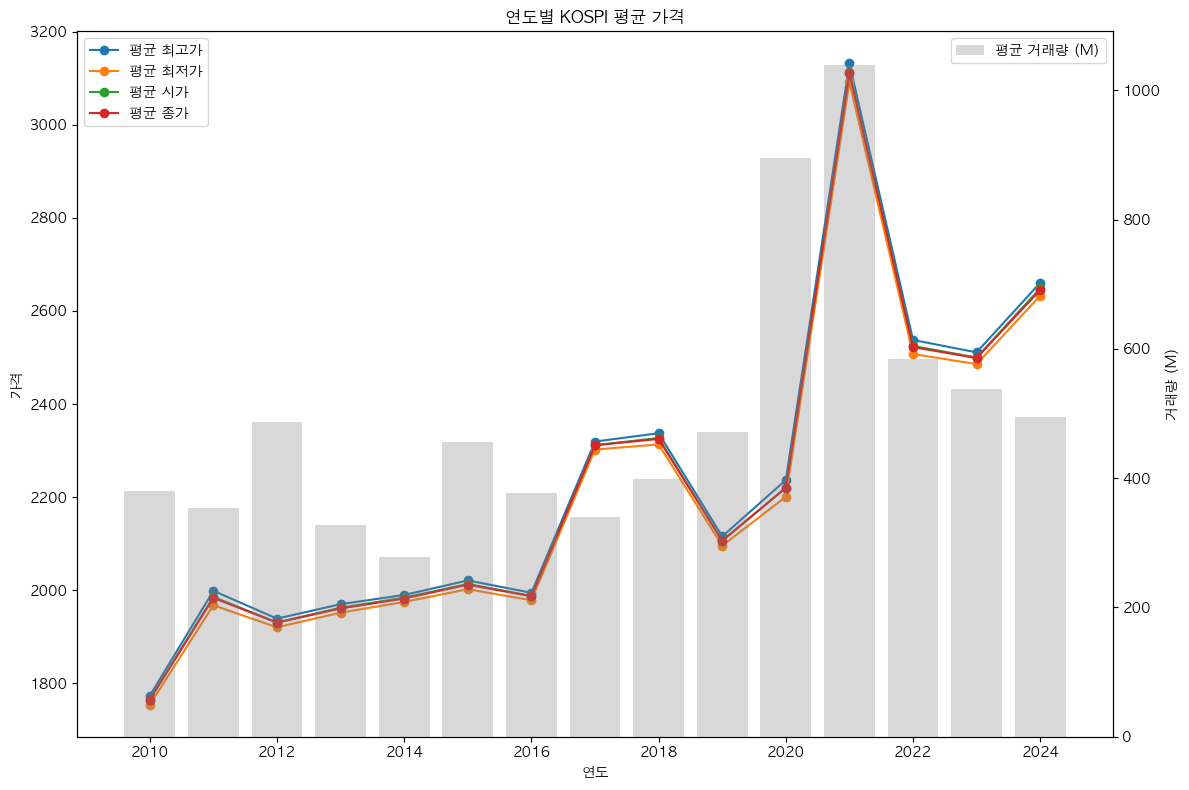

In [88]:
# 1-2. 시각화
fig, ax1 = plt.subplots(figsize=(12, 8))

# 최고가, 최저가, 시가, 종가 그래프
ax1.plot(yearly_mean['연'], yearly_mean['평균 최고가'], label='평균 최고가', marker='o')
ax1.plot(yearly_mean['연'], yearly_mean['평균 최저가'], label='평균 최저가', marker='o')
ax1.plot(yearly_mean['연'], yearly_mean['평균 시가'], label='평균 시가', marker='o')
ax1.plot(yearly_mean['연'], yearly_mean['평균 종가'], label='평균 종가', marker='o')

ax1.set_xlabel('연도')
ax1.set_ylabel('가격')
ax1.set_title('연도별 KOSPI 평균 가격')
ax1.legend(loc='upper left')

# 거래량 막대 그래프
ax2 = ax1.twinx()
ax2.bar(yearly_mean['연'], yearly_mean['평균 거래량 (M)'], color='gray', alpha=0.3, label='평균 거래량 (M)')
ax2.set_ylabel('거래량 (M)')
ax2.legend(loc='upper right')

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [89]:
# 1-3. 연과 월 그룹화 / 통계 계산


# 거래량 열을 숫자로 변환
def convert_trading_volume(volume):
    if 'M' in volume:
        return float(volume.replace('M', '')) * 1e6
    elif 'B' in volume:
        return float(volume.replace('B', '')) * 1e9
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1e3
    return float(volume)

kospi['trading'] = kospi['trading'].astype(str).apply(convert_trading_volume)






# 연과 월 그룹화 / 통계 계산
yearly_stats = kospi.groupby('year').agg({
    'high': 'max',        # 최고가
    'low': 'min',         # 최저가
    'start': ['max', 'min'], # 최고 시가, 최저 시가
    'end': ['max', 'min'], # 최고 종가, 최저 종가
    'percent': ['max', 'min'], # 최고 변동률, 최저 변동률
    'trading': ['max', 'min'],      # 거래량 최고, 최저
}).reset_index()

# 열 이름
yearly_stats.columns = ['연', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동', '최저변동', '최고거래량', '최저거래량']

# 거래량을 정수로 변환하여 지수 표기법 방지
yearly_stats['최고거래량'] = yearly_stats['최고거래량'].astype(int)
yearly_stats['최저거래량'] = yearly_stats['최저거래량'].astype(int)

# 출력
yearly_stats

,연,최고가,최저가,최고시가,최저시가,최고종가,최저종가,최고변동,최저변동,최고거래량,최저거래량
0,2010,2052.97,1532.68,2047.82,1550.80,2051.00,1552.79,2.11,-3.05,695740000,242700000
1,2011,2231.47,1644.11,2225.95,1683.94,2228.96,1652.71,5.02,-6.22,684990000,207670000
2,2012,2057.28,1758.99,2054.63,1760.22,2049.28,1769.31,2.92,-3.40,1210000000,245570000
3,2013,2063.28,1770.53,2062.81,1790.33,2059.58,1780.63,2.93,-2.00,828730000,172230
4,2014,2093.08,1881.73,2083.03,1894.96,2082.61,1886.85,1.84,-2.20,541160000,168830000
5,2015,2189.54,1800.75,2181.24,1840.94,2173.41,1829.81,2.96,-2.47,1160000000,258779999
6,2016,2073.89,1817.97,2069.30,1848.10,2068.72,1835.28,2.26,-3.09,750550000,201940000
7,2017,2561.63,2015.68,2560.34,2022.23,2557.97,2026.16,2.30,-1.73,825480000,184190000
8,2018,2607.10,1985.95,2590.41,1985.95,2598.19,1996.05,3.53,-4.44,816930000,206500000
9,2019,2252.05,1891.81,2249.05,1900.36,2248.63,1909.71,1.95,-3.04,1010000000,257450000


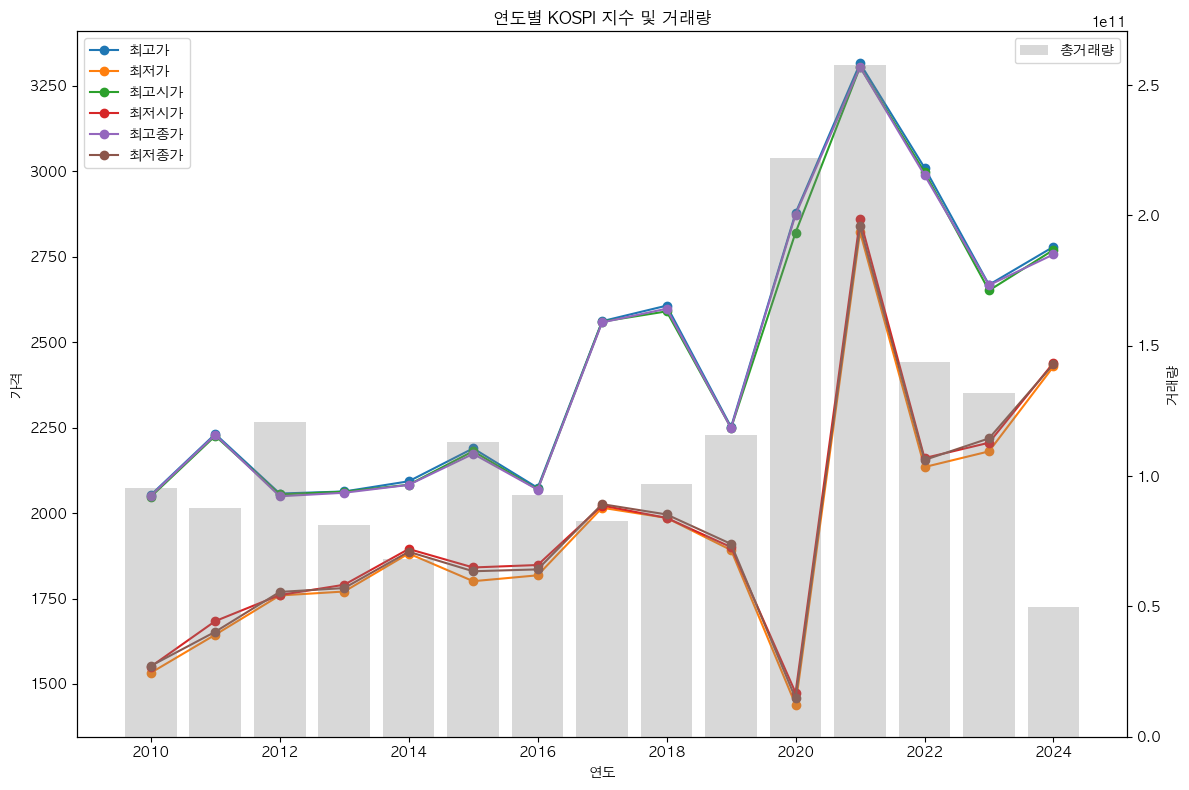

In [90]:
# 1-4. 연도별 그룹화 및 통계 시각화

# 거래량 열을 숫자로 변환
def convert_trading_volume(volume):
    if 'M' in volume:
        return float(volume.replace('M', '')) * 1e6
    elif 'B' in volume:
        return float(volume.replace('B', '')) * 1e9
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1e3
    return float(volume)

kospi['trading'] = kospi['trading'].astype(str).apply(convert_trading_volume)

# 연도별 그룹화 및 통계 계산
yearly_stats = kospi.groupby('year').agg({
    'high': 'max',        # 최고가
    'low': 'min',         # 최저가
    'start': ['max', 'min'], # 최고 시가, 최저 시가
    'end': ['max', 'min'], # 최고 종가, 최저 종가
    'percent': ['max', 'min'], # 최고 변동률, 최저 변동률
    'trading': ['max', 'min', 'sum']      # 거래량 최고, 최저, 합계
}).reset_index()

# 열 이름 평탄화
yearly_stats.columns = ['연', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동', '최저변동', '최고거래량', '최저거래량', '총거래량']

# 거래량을 정수로 변환하여 지수 표기법 방지
yearly_stats['최고거래량'] = yearly_stats['최고거래량'].astype(int)
yearly_stats['최저거래량'] = yearly_stats['최저거래량'].astype(int)
yearly_stats['총거래량'] = yearly_stats['총거래량'].astype(int)

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 8))

# 최고가, 최저가, 최고 시가, 최저 시가, 최고 종가, 최저 종가 그래프
ax1.plot(yearly_stats['연'], yearly_stats['최고가'], label='최고가', marker='o')
ax1.plot(yearly_stats['연'], yearly_stats['최저가'], label='최저가', marker='o')
ax1.plot(yearly_stats['연'], yearly_stats['최고시가'], label='최고시가', marker='o')
ax1.plot(yearly_stats['연'], yearly_stats['최저시가'], label='최저시가', marker='o')
ax1.plot(yearly_stats['연'], yearly_stats['최고종가'], label='최고종가', marker='o')
ax1.plot(yearly_stats['연'], yearly_stats['최저종가'], label='최저종가', marker='o')

ax1.set_xlabel('연도')
ax1.set_ylabel('가격')
ax1.set_title('연도별 KOSPI 지수 및 거래량')
ax1.legend(loc='upper left')

# 거래량 막대 그래프
ax2 = ax1.twinx()
ax2.bar(yearly_stats['연'], yearly_stats['총거래량'], color='gray', alpha=0.3, label='총거래량')
ax2.set_ylabel('거래량')
ax2.legend(loc='upper right')

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [91]:
# 2-1. 각 연도 월별 데이터

# 2010년도 데이터
kospi_2010 = kospi[kospi['year'] == 2010]

# 월별로 그룹화 / 통계 계산
month_2010 = kospi_2010.groupby('month').agg({
    'high': 'max',        # 최고가
    'low': 'min',         # 최저가
    'start': ['max', 'min'], # 최고 시가, 최저 시가
    'end': ['max', 'min'], # 최고 종가, 최저 종가
    'percent': ['max', 'min'] # 최고 변동률, 최저 변동률
}).reset_index()

# 열 이름
month_2010.columns = ['10년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']

# 출력
month_2010

,10년 월별,최고가,최저가,최고시가,최저시가,최고종가,최저종가,최고변동률,최저변동률
0,1,1723.22,1595.39,1723.01,1621.00,1722.01,1602.43,1.04,-2.44
1,2,1631.71,1548.78,1630.89,1550.80,1628.90,1552.79,2.08,-3.05
2,3,1705.57,1608.97,1705.51,1612.43,1700.19,1615.12,2.11,-0.80
3,4,1757.76,1695.30,1748.84,1695.30,1752.20,1705.30,1.72,-1.68
4,5,1740.15,1532.68,1735.68,1565.59,1721.21,1560.83,1.90,-2.75
5,6,1741.48,1618.57,1735.31,1628.06,1739.87,1630.40,1.93,-1.57
6,7,1778.72,1650.30,1775.47,1664.87,1773.47,1671.82,1.43,-0.86
7,8,1797.42,1716.86,1796.63,1724.00,1790.60,1721.75,1.77,-2.07
8,9,1873.79,1748.30,1870.21,1751.96,1872.81,1764.69,1.26,-0.66
9,10,1924.61,1837.08,1919.48,1844.41,1919.41,1857.32,1.33,-1.41


In [92]:
# 2-2. 2011년도 데이터
kospi_2011 = kospi[kospi['year'] == 2011]

# 월별 그룹 / 통계 계산
month_2011 = kospi_2011.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2011.columns = ['14년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']

month_2011

,14년 월별,최고가,최저가,최고시가,최저시가,최고종가,최저종가,최고변동률,최저변동률
0,1,2121.06,2054.83,2115.69,2063.69,2115.69,2069.73,1.14,-1.81
1,2,2107.83,1935.93,2102.76,1954.40,2081.74,1939.30,1.89,-1.81
2,3,2106.74,1882.09,2098.09,1921.59,2106.70,1923.92,2.20,-2.40
3,4,2231.47,2081.98,2225.95,2091.68,2216.00,2089.40,2.23,-1.55
4,5,2229.09,2030.68,2224.40,2052.44,2228.96,2035.87,2.75,-2.64
5,6,2152.95,2008.84,2142.67,2030.54,2141.34,2019.65,1.70,-1.91
6,7,2192.83,2105.24,2192.83,2117.12,2180.59,2109.73,1.22,-2.20
7,8,2173.28,1684.68,2160.09,1733.92,2172.31,1710.70,4.83,-6.22
8,9,1928.40,1644.11,1887.21,1704.25,1880.70,1652.71,5.02,-5.73
9,10,1963.74,1658.06,1961.09,1683.94,1929.48,1666.52,3.26,-3.59


In [93]:
# 2-3. 2012년-2024년 월별 데이터

# 2012년도 데이터
kospi_2012 = kospi[kospi['year'] == 2012]

# 월별 그룹 / 통계 계산
month_2012 = kospi_2012.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2012.columns = ['12년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']
month_2012


# 2013년도 데이터
kospi_2013 = kospi[kospi['year'] == 2013]

# 월별 그룹 / 통계 계산
month_2013 = kospi_2013.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2013.columns = ['13년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']
month_2013


# 2014년도 데이터
kospi_2014 = kospi[kospi['year'] == 2014]

# 월별 그룹 / 통계 계산
month_2014 = kospi_2014.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2014.columns = ['14년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']
month_2014


# 2015년도 데이터
kospi_2015 = kospi[kospi['year'] == 2015]

# 월별 그룹 / 통계 계산
month_2015 = kospi_2015.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2015.columns = ['15년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']
month_2015


# 2016년도 데이터
kospi_2016 = kospi[kospi['year'] == 2016]

# 월별 그룹 / 통계 계산
month_2016 = kospi_2016.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2016.columns = ['16년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']
month_2016


# 2017년도 데이터
kospi_2017 = kospi[kospi['year'] == 2017]

# 월별 그룹 / 통계 계산
month_2017 = kospi_2017.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2017.columns = ['17년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']
month_2017


# 2018년도 데이터
kospi_2018 = kospi[kospi['year'] == 2018]

# 월별 그룹 / 통계 계산
month_2018 = kospi_2018.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2018.columns = ['18년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']
month_2018


# 2019년도 데이터
kospi_2019 = kospi[kospi['year'] == 2019]

# 월별 그룹 / 통계 계산
month_2019 = kospi_2019.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2019.columns = ['19년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']
month_2019


# 2020년도 데이터
kospi_2020 = kospi[kospi['year'] == 2020]

# 월별 그룹 / 통계 계산
month_2020 = kospi_2020.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2020.columns = ['20년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']
month_2020


# 2021년도 데이터
kospi_2021 = kospi[kospi['year'] == 2021]

# 월별 그룹 / 통계 계산
month_2021 = kospi_2021.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2021.columns = ['21년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']
month_2021


# 2022년도 데이터
kospi_2022 = kospi[kospi['year'] == 2022]

# 월별 그룹 / 통계 계산
month_2022 = kospi_2022.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2022.columns = ['22년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']
month_2022



# 2023년도 데이터
kospi_2023 = kospi[kospi['year'] == 2023]

# 월별 그룹 / 통계 계산
month_2023 = kospi_2023.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2023.columns = ['23년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']
month_2023



# 2024년도 데이터
kospi_2024 = kospi[kospi['year'] == 2024]

# 월별 그룹 / 통계 계산
month_2024 = kospi_2024.groupby('month').agg({
    'high':'max',
    'low':'min',
    'start':['max','min'],
    'end':['max','min'],
    'percent':['max','min']
}).reset_index()

# 열이름
month_2024.columns = ['24년 월별', '최고가', '최저가', '최고시가', '최저시가', '최고종가', '최저종가', '최고변동률', '최저변동률']
month_2024



month_2010
month_2011
month_2012
month_2013
month_2014
month_2015
month_2016
month_2017
month_2018
month_2019
month_2020
month_2021
month_2022
month_2023
month_2024

,24년 월별,최고가,최저가,최고시가,최저시가,최고종가,최저종가,최고변동률,최저변동률
0,1,2675.80,2429.12,2645.47,2439.96,2669.81,2435.90,1.34,-2.47
1,2,2694.80,2491.93,2681.03,2491.93,2680.26,2542.46,2.87,-1.10
2,3,2779.40,2630.16,2757.27,2638.84,2757.09,2641.49,2.41,-1.91
3,4,2769.87,2553.55,2766.24,2595.46,2753.16,2584.18,2.01,-2.28
4,5,2773.46,2676.63,2770.27,2679.04,2753.00,2676.63,2.16,-1.68


In [94]:
# 3-1. 연도 최고/최저 변동률
# 데이터 전처리 및 그룹화
yearly_change = kospi.groupby('year').agg({
    'percent': ['max', 'min']
}).reset_index()

# 열 이름
yearly_change.columns = ['연도', '최고변동률', '최저변동률']

# 출력
yearly_change

,연도,최고변동률,최저변동률
0,2010,2.11,-3.05
1,2011,5.02,-6.22
2,2012,2.92,-3.40
3,2013,2.93,-2.00
4,2014,1.84,-2.20
5,2015,2.96,-2.47
6,2016,2.26,-3.09
7,2017,2.30,-1.73
8,2018,3.53,-4.44
9,2019,1.95,-3.04


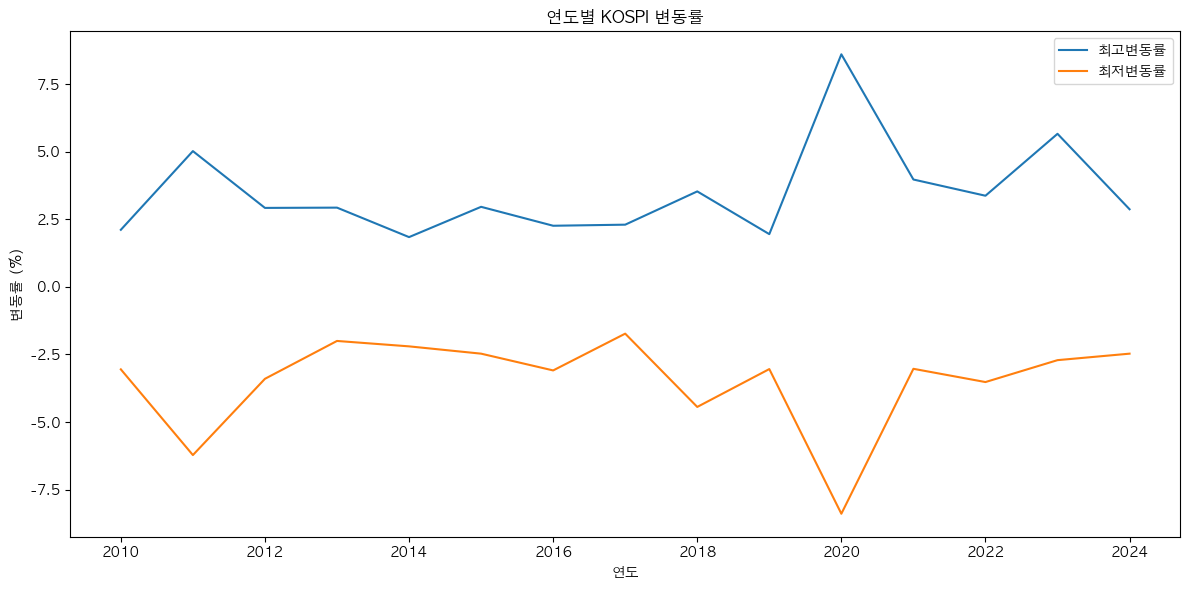

In [95]:
# 3-2. 변동율 그래프
# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 6))

# 최고 변동률과 최저 변동률 그래프
ax.plot(yearly_change['연도'], yearly_change['최고변동률'], label='최고변동률')
ax.plot(yearly_change['연도'], yearly_change['최저변동률'], label='최저변동률')

ax.set_xlabel('연도')
ax.set_ylabel('변동률 (%)')
ax.set_title('연도별 KOSPI 변동률')
ax.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [96]:
# 4-1. 연도별 그룹화 및 최고가, 최저가 계산
yearly_stats = kospi.groupby('year').agg({
    'high': 'max',        # 최고가
    'low': 'min',         # 최저가
}).reset_index()

# 열 이름
yearly_stats.columns = ['연도', '최고가', '최저가']

yearly_stats

,연도,최고가,최저가
0,2010,2052.97,1532.68
1,2011,2231.47,1644.11
2,2012,2057.28,1758.99
3,2013,2063.28,1770.53
4,2014,2093.08,1881.73
5,2015,2189.54,1800.75
6,2016,2073.89,1817.97
7,2017,2561.63,2015.68
8,2018,2607.10,1985.95
9,2019,2252.05,1891.81


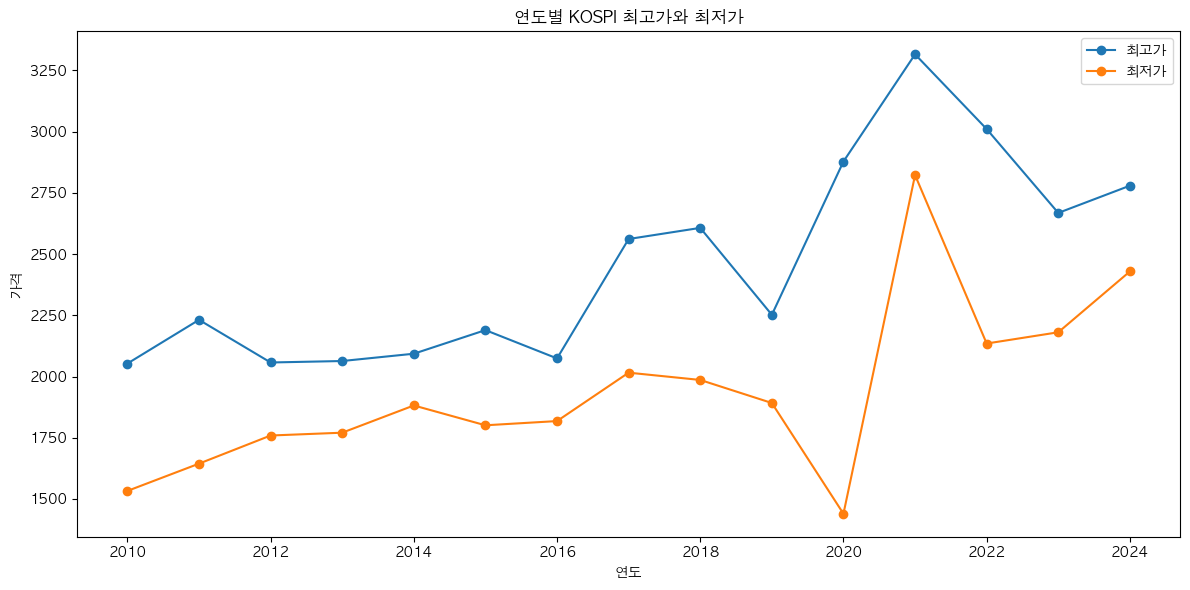

In [97]:
# 4-2. 연도별 최고시가 최저시가 그래프
fig, ax = plt.subplots(figsize=(12, 6))

# 최고가와 최저가 그래프
ax.plot(yearly_stats['연도'], yearly_stats['최고가'], label='최고가', marker='o')
ax.plot(yearly_stats['연도'], yearly_stats['최저가'], label='최저가', marker='o')

ax.set_xlabel('연도')
ax.set_ylabel('가격')
ax.set_title('연도별 KOSPI 최고가와 최저가')
ax.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [98]:
# 5-1. 연도별 최고시가 최저시가

In [99]:
# 연도별 그룹화 및 최고 시가, 최저 시가 계산
yearly_start = kospi.groupby('year').agg({
    'start': ['max', 'min'] # 최고 시가, 최저 시가
}).reset_index()

# 열 이름
yearly_start.columns = ['연도', '최고시가', '최저시가']
yearly_start

,연도,최고시가,최저시가
0,2010,2047.82,1550.80
1,2011,2225.95,1683.94
2,2012,2054.63,1760.22
3,2013,2062.81,1790.33
4,2014,2083.03,1894.96
5,2015,2181.24,1840.94
6,2016,2069.30,1848.10
7,2017,2560.34,2022.23
8,2018,2590.41,1985.95
9,2019,2249.05,1900.36


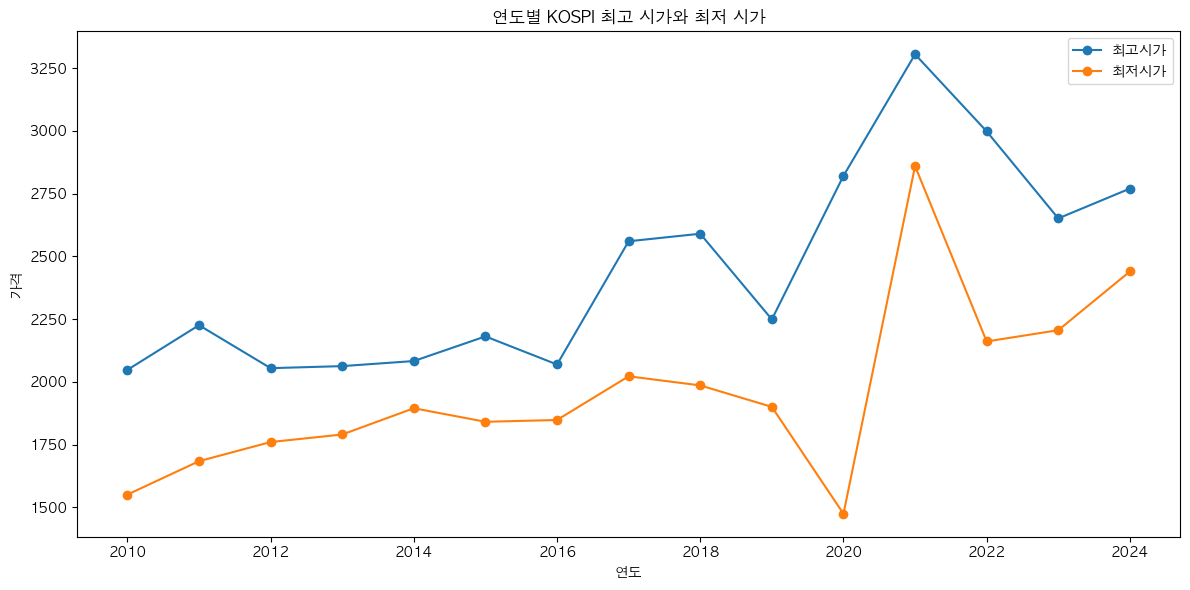

In [100]:
# 5-2. 그래프 생성
fig, ax = plt.subplots(figsize=(12, 6))

# 최고 시가와 최저 시가 그래프
ax.plot(yearly_start['연도'], yearly_start['최고시가'], label='최고시가', marker='o')
ax.plot(yearly_start['연도'], yearly_start['최저시가'], label='최저시가', marker='o')

ax.set_xlabel('연도')
ax.set_ylabel('가격')
ax.set_title('연도별 KOSPI 최고 시가와 최저 시가')
ax.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [101]:
# 6-1. 연도별 그룹화 및 최고 종가, 최저 종가 계산
yearly_end = kospi.groupby('year').agg({
    'end': ['max', 'min'] # 최고 종가, 최저 종가
}).reset_index()

# 열 이름 평탄화
yearly_end.columns = ['연도', '최고종가', '최저종가']

yearly_end

,연도,최고종가,최저종가
0,2010,2051.00,1552.79
1,2011,2228.96,1652.71
2,2012,2049.28,1769.31
3,2013,2059.58,1780.63
4,2014,2082.61,1886.85
5,2015,2173.41,1829.81
6,2016,2068.72,1835.28
7,2017,2557.97,2026.16
8,2018,2598.19,1996.05
9,2019,2248.63,1909.71


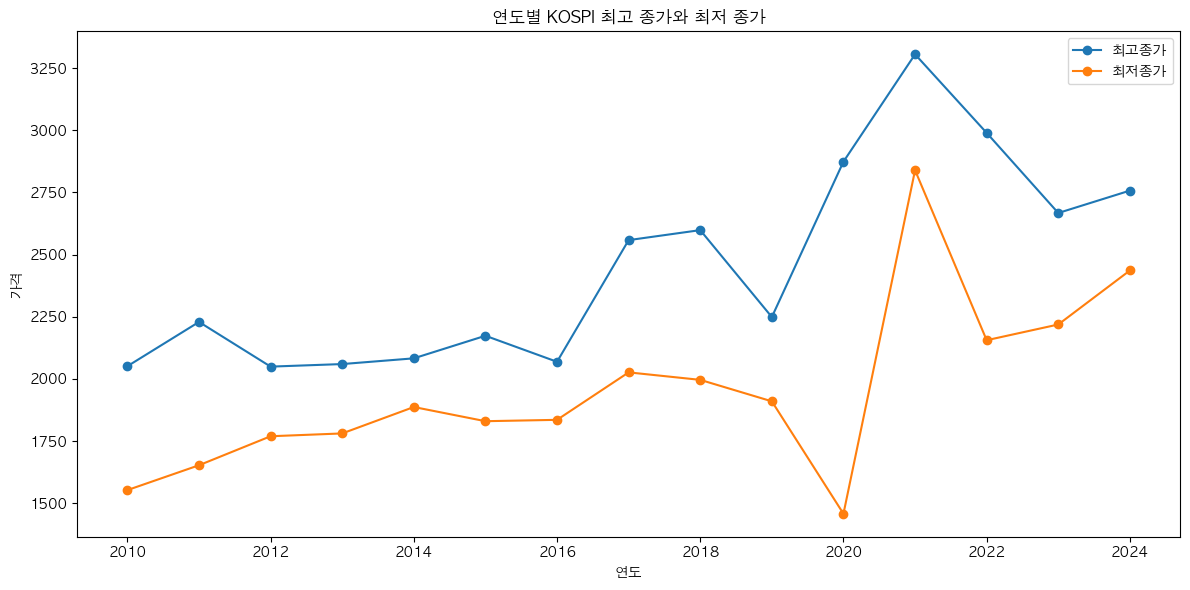

In [102]:
# 6-2. 그래프 생성
fig, ax = plt.subplots(figsize=(12, 6))

# 최고 종가와 최저 종가 그래프
ax.plot(yearly_end['연도'], yearly_end['최고종가'], label='최고종가', marker='o')
ax.plot(yearly_end['연도'], yearly_end['최저종가'], label='최저종가', marker='o')

ax.set_xlabel('연도')
ax.set_ylabel('가격')
ax.set_title('연도별 KOSPI 최고 종가와 최저 종가')
ax.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [104]:
# 필요한 경우 열을 문자열로 변환한 후, 정리하고 적절한 타입으로 변환
kospi['year'] = kospi['year'].astype(str).str.replace('년', '').astype(int)
kospi['month'] = kospi['month'].astype(str).str.replace('월', '').astype(int)
kospi['day'] = kospi['day'].astype(str).str.replace('일', '').astype(int)
kospi['date'] = pd.to_datetime(kospi[['year', 'month', 'day']])

kospi['end'] = kospi['end'].astype(str).str.replace(',', '').astype(float)
kospi['start'] = kospi['start'].astype(str).str.replace(',', '').astype(float)
kospi['high'] = kospi['high'].astype(str).str.replace(',', '').astype(float)
kospi['low'] = kospi['low'].astype(str).str.replace(',', '').astype(float)
kospi['percent'] = kospi['percent'].astype(str).str.replace('%', '').astype(float)

# 거래량 열을 숫자로 변환
def convert_trading_volume(volume):
    if 'M' in volume:
        return float(volume.replace('M', '')) * 1e6
    elif 'B' in volume:
        return float(volume.replace('B', '')) * 1e9
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1e3
    return float(volume)

kospi['trading'] = kospi['trading'].astype(str).apply(convert_trading_volume)

# 분기 계산
kospi['quarter'] = kospi['date'].dt.to_period('Q')

# 분기별 데이터 분석
quarterly_stats = kospi.groupby('quarter').agg({
    'high': 'mean',
    'low': 'mean',
    'start': 'mean',
    'end': 'mean',
    'percent': 'mean',
    'trading': 'mean'
}).reset_index()

# 열 이름 설정
quarterly_stats.columns = ['분기', '평균 최고가', '평균 최저가', '평균 시가', '평균 종가', '평균 변동률', '평균 거래량']

# 분기별 데이터 출력
import ace_tools as tools; tools.display_dataframe_to_user(name="분기별 KOSPI 데이터 분석", dataframe=quarterly_stats)

# 분기별 데이터 출력
print(quarterly_stats)

ModuleNotFoundError: No module named 'ace_tools'

In [106]:
# 필요한 경우 열을 문자열로 변환한 후, 정리하고 적절한 타입으로 변환
kospi['year'] = kospi['year'].astype(str).str.replace('년', '').astype(int)
kospi['month'] = kospi['month'].astype(str).str.replace('월', '').astype(int)
kospi['day'] = kospi['day'].astype(str).str.replace('일', '').astype(int)
kospi['date'] = pd.to_datetime(kospi[['year', 'month', 'day']])

kospi['end'] = kospi['end'].astype(str).str.replace(',', '').astype(float)
kospi['start'] = kospi['start'].astype(str).str.replace(',', '').astype(float)
kospi['high'] = kospi['high'].astype(str).str.replace(',', '').astype(float)
kospi['low'] = kospi['low'].astype(str).str.replace(',', '').astype(float)
kospi['percent'] = kospi['percent'].astype(str).str.replace('%', '').astype(float)

# 거래량 열을 숫자로 변환
def convert_trading_volume(volume):
    if 'M' in volume:
        return float(volume.replace('M', '')) * 1e6
    elif 'B' in volume:
        return float(volume.replace('B', '')) * 1e9
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1e3
    return float(volume)

kospi['trading'] = kospi['trading'].astype(str).apply(convert_trading_volume)

# 분기 계산
kospi['quarter'] = kospi['date'].dt.to_period('Q')

# 분기별 데이터 분석
quarterly_stats = kospi.groupby('quarter').agg({
    'high': 'mean',
    'low': 'mean',
    'start': 'mean',
    'end': 'mean',
    'percent': 'mean',
    'trading': 'mean'
}).reset_index()

# 열 이름 설정
quarterly_stats.columns = ['분기', '평균 최고가', '평균 최저가', '평균 시가', '평균 종가', '평균 변동률', '평균 거래량']

# 분기별 데이터 출력
quarterly_stats



,분기,평균 최고가,평균 최저가,평균 시가,평균 종가,평균 변동률,평균 거래량
0,2010Q1,1658.918689,1640.533279,1651.676721,1650.236230,0.015082,4.198610e+08
1,2010Q2,1700.032903,1679.387258,1690.780000,1692.172419,0.011613,3.868627e+08
2,2010Q3,1774.366508,1757.883810,1766.958889,1767.491746,0.158571,3.437756e+08
3,2010Q4,1949.066769,1928.163231,1939.718769,1939.727538,0.143077,3.744735e+08
4,2011Q1,2046.305333,2020.188500,2034.914167,2033.855167,0.050333,3.361987e+08
5,2011Q2,2130.408065,2102.113710,2118.625968,2116.463548,0.002097,3.131019e+08
6,2011Q3,1958.573810,1918.123492,1941.932222,1938.049841,-0.246032,3.792684e+08
7,2011Q4,1863.649206,1834.943810,1851.787460,1849.823651,0.065238,3.849873e+08
8,2012Q1,1982.696290,1962.839194,1973.921935,1973.865161,0.162903,5.198847e+08
9,2012Q2,1918.735246,1899.494262,1911.249836,1909.897541,-0.129016,4.611856e+08


In [ ]:
# 시각화
fig, ax1 = plt.subplots(figsize=(12, 8))

# 평균 최고가, 최저가, 시가, 종가 그래프
ax1.plot(quarterly_stats['분기'].astype(str), quarterly_stats['평균 최고가'], label='평균 최고가', marker='o')
ax1.plot(quarterly_stats['분기'].astype(str), quarterly_stats['평균 최저가'], label='평균 최저가', marker='o')
ax1.plot(quarterly_stats['분기'].astype(str), quarterly_stats['평균 시가'], label='평균 시가', marker='o')
ax1.plot(quarterly_stats['분기'].astype(str), quarterly_stats['평균 종가'], label='평균 종가', marker='o')

ax1.set_xlabel('분기')
ax1.set_ylabel('가격')
ax1.set_title('분기별 KOSPI 평균 가격')
ax1.legend(loc='upper left')

# 평균 거래량 막대 그래프
ax2 = ax1.twinx()
ax2.bar(quarterly_stats['분기'].astype(str), quarterly_stats['평균 거래량'], color='gray', alpha=0.3, label='평균 거래량')
ax2.set_ylabel('거래량')
ax2.legend(loc='upper right')

# 레이아웃 조정
plt.tight_layout()
plt.show()